### import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_csv("chatgpt_reviews.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272672 entries, 0 to 272671
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              272672 non-null  object
 1   userName              272670 non-null  object
 2   content               272663 non-null  object
 3   score                 272672 non-null  int64 
 4   thumbsUpCount         272672 non-null  int64 
 5   reviewCreatedVersion  248638 non-null  object
 6   at                    272672 non-null  object
 7   appVersion            248638 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.6+ MB


# 1.Data Quality

#### Find Duplicates

In [3]:
df.duplicated().sum()

np.int64(2509)

#### Remove Duplicates

In [4]:
df = df.drop_duplicates()

#### Handling Missing Values

In [5]:
missing_values = df.isnull().sum()
missing_values

reviewId                    0
userName                    2
content                     9
score                       0
thumbsUpCount               0
reviewCreatedVersion    23904
at                          0
appVersion              23904
dtype: int64

In [6]:
df['userName'] = df.userName.fillna('Unknown')

df['content'] = df.content.fillna('')

df['reviewCreatedVersion'] = df.reviewCreatedVersion.fillna('Unknown')

df['appVersion'] = df.appVersion.fillna('Unknown')

#### Handling Datatypes

In [7]:
df['at'] = pd.to_datetime(df['at'], errors = 'coerce')

# 2.Text Normalization

#### Ensuring Consistency

In [8]:
df['year'] = df['at'].dt.year
df['day_of_week'] = df['at'].dt.day_name()
df['month'] = df['at'].dt.month_name()
df['year_month'] = df['at'].dt.to_period('M')

In [9]:
df['majorVersion'] = df['appVersion'].str.split('.').str[1]
df['majorVersion'] = pd.to_numeric(df.majorVersion, errors = 'coerce')
df['majorVersion'] = df['majorVersion'].fillna(0)

In [10]:
filter = df[(df.majorVersion == 2023) & (df.year == 2024)]
filter.head()

reviewId                 userName  \
4724  c8e55c56-e1a1-4663-9976-a0722b9deaa6              Prodyut Dey   
4845  266e93bf-3623-4724-a229-dde88f29c1d4  Byamukama Joseph kanahe   
5102  dd0fa11d-f493-41fb-a98c-5505b0160d7d                Mr Yaseen   
7530  7f8ea406-6d28-404f-a1dd-0c0039d14587             John Lumpkin   
9122  ed0d0aeb-b001-4b28-87ea-f5ba018efe6c              Taiwo Yusuf   

                                                content  score  thumbsUpCount  \
4724                                        Excellent 👍      5              0   
4845                                          Wonderful      5              0   
5102                                            amazing      5              0   
7530  This app has changed alot and I've learned to ...      4              1   
9122                                          I love it      5              0   

     reviewCreatedVersion                  at  appVersion  year day_of_week  \
4724           1.2023.243 2024-11-10 08:18:46  1.2023.243  2024      Sunday   
4845           1.2023.242 2024-11-10 06:32:26  1.2023.242  2024      Sunday   
5102           1.2023.263 2024-11-10 02:38:33  1.2023.263  2024      Sunday   
7530           1.2023.313 2024-11-07 05:10:49  1.2023.313  2024    Thursday   
9122           1.2023.242 2024-11-05 07:40:19  1.2023.242  2024     Tuesday   

         month year_month  majorVersion  
4724  November    2024-11        2023.0  
4845  November    2024-11        2023.0  
5102  November    2024-11        2023.0  
7530  November    2024-11        2023.0  
9122  November    2024-11        2023.0

In [11]:
df.loc[(df.majorVersion == 0) & (df.year == 2023), 'majorVersion'] = 2023
df.loc[(df.majorVersion == 0) & (df.year == 2023), 'majorVersion'] = 2023

In [12]:
df.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
year                    0
day_of_week             0
month                   0
year_month              0
majorVersion            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270163 entries, 0 to 272671
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              270163 non-null  object        
 1   userName              270163 non-null  object        
 2   content               270163 non-null  object        
 3   score                 270163 non-null  int64         
 4   thumbsUpCount         270163 non-null  int64         
 5   reviewCreatedVersion  270163 non-null  object        
 6   at                    270163 non-null  datetime64[ns]
 7   appVersion            270163 non-null  object        
 8   year                  270163 non-null  int32         
 9   day_of_week           270163 non-null  object        
 10  month                 270163 non-null  object        
 11  year_month            270163 non-null  period[M]     
 12  majorVersion          270163 non-null  float64       
dtypes: d

#### Handling Puntuations and symbols

In [29]:
from bs4 import BeautifulSoup
import re

def clean_df(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'#\w+', '', text)
    return text.lower().strip()

df['content'] = df.content.apply(clean_df)

C:\Users\OM\AppData\Local\Temp\ipykernel_11648\987094038.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


# 3.User Engagement

#### Distribution of Overall Score 

Counts  Proportions
score                     
1       16513     6.112236
2        4725     1.748944
3       11099     4.108261
4       30715    11.369062
5      207111    76.661497

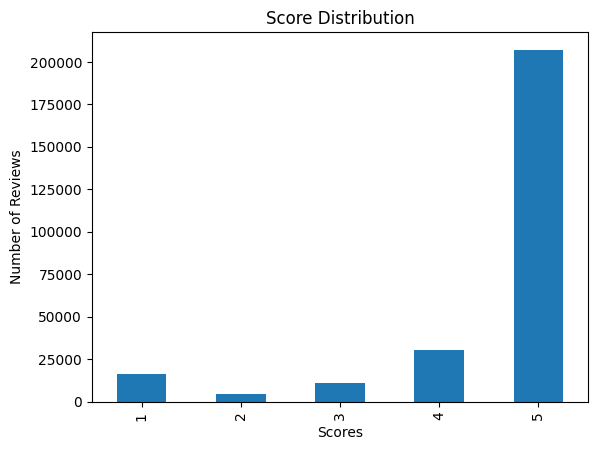

In [15]:
score_distribution = df['score'].value_counts().sort_index()
score_distribution_proportion = df['score'].value_counts(normalize=True) * 100
distribution_table = pd.concat([score_distribution, score_distribution_proportion], axis=1, keys=['Counts', 'Proportions'])
score_distribution.plot(kind='bar', title='Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Number of Reviews')
distribution_table

#### Distribution of each Score by versions

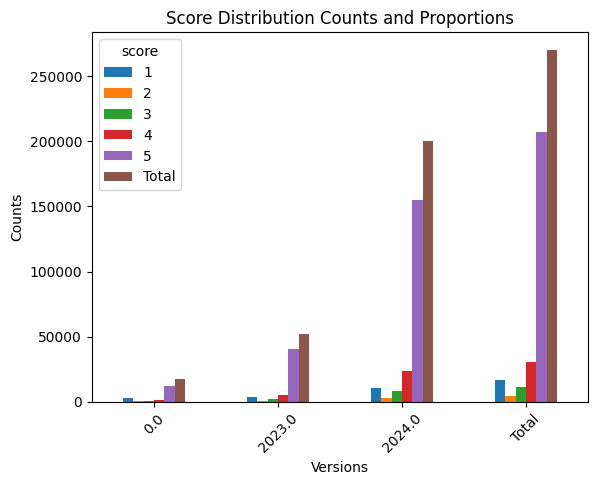

Counts                                     Proportions            \
score             1     2      3      4       5   Total           1         2   
majorVersion                                                                    
0.0            2568   512    769   1632   12356   17837    0.950537  0.189515   
2023.0         3687   928   2002   5574   40206   52397    1.364732  0.343496   
2024.0        10258  3285   8328  23509  154549  199929    3.796967  1.215933   
Total         16513  4725  11099  30715  207111  270163    6.112236  1.748944   

                                                          
score                3          4          5       Total  
majorVersion                                              
0.0           0.284643   0.604080   4.573535    6.602310  
2023.0        0.741034   2.063199  14.882127   19.394588  
2024.0        3.082583   8.701784  57.205835   74.003102  
Total         4.108261  11.369062  76.661497  100.000000

In [16]:
score_distribution_byVersion = df.groupby('majorVersion')['score'].value_counts().sort_index()

score_counts = pd.crosstab(df['majorVersion'], df['score'], dropna=False, margins=True, margins_name="Total")

score_counts_proportions = pd.crosstab(df['majorVersion'], df['score'], dropna=False, margins=True, margins_name="Total", normalize=True)*100

score_counts_combined = pd.concat([score_counts, score_counts_proportions], axis=1, keys=['Counts', 'Proportions'])

score_counts_combined['Counts'].plot(kind='bar', stacked=False, title='Score Distribution Counts and Proportions')
plt.xlabel('Versions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

score_counts_combined

# 4.Sentiment Analysis

#### Sepration of sentiment using polarity

In [17]:
from textblob import TextBlob
df['polarity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [18]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']
neutral_reviews = df[df['sentiment'] == 'neutral']

#### Common words used in each type of reviews

In [19]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pandas as pd

simple_stopwords = set(stopwords.words('english'))
def get_common_words(reviews, stopwords, num_words=10):
    all_text = ' '.join(reviews.dropna()).lower()
    words = [word for word in all_text.split() if word.isalpha() and word not in stopwords]
    return Counter(words).most_common(num_words)
    
#get  common words from each review category for word count
positive_words = get_common_words(positive_reviews['content'], simple_stopwords,num_words=10)
negative_words = get_common_words(negative_reviews['content'], simple_stopwords,num_words=10)
neutral_words = get_common_words(neutral_reviews['content'], simple_stopwords,num_words=10)


positive_df = pd.DataFrame(positive_words, columns=['Word', 'Positive Count'])
negative_df = pd.DataFrame(negative_words, columns=['Word', 'Negative Count'])
neutral_df = pd.DataFrame(neutral_words, columns=['Word', 'Neutral Count'])

merged_df = pd.merge(positive_df, negative_df, on='Word', how='outer')
merged_df = pd.merge(merged_df, neutral_df, on='Word', how='outer')

merged_df.fillna(0)
 

Word  Positive Count  Negative Count  Neutral Count
0        ai         11754.0           730.0         1166.0
1   amazing          9563.0             0.0            0.0
2    answer             0.0           617.0            0.0
3       app         50871.0          2621.0         4941.0
4       bad             0.0          1082.0            0.0
5      best         24421.0             0.0            0.0
6      chat             0.0           673.0         1031.0
7   chatgpt             0.0           828.0         1389.0
8      even             0.0           756.0            0.0
9      good         53332.0             0.0            0.0
10      gpt             0.0             0.0          900.0
11    great         14267.0             0.0            0.0
12      hai             0.0             0.0          892.0
13  helpful         11612.0             0.0         2212.0
14    helps             0.0             0.0          961.0
15     like             0.0           790.0         2149.0
16     love         11248.0             0.0            0.0
17     nice         19483.0             0.0            0.0
18    thank             0.0             0.0         1004.0
19      use             0.0           759.0            0.0
20   useful          9512.0             0.0            0.0
21    wrong             0.0           977.0            0.0

#### Sentiment Changes over time

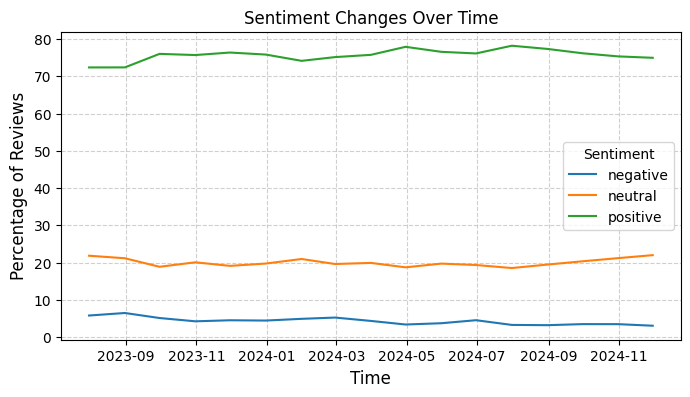

In [32]:
sentiment_over_time = df.groupby(pd.Grouper(key='at', freq='ME'))['sentiment'].value_counts().unstack(fill_value=0)

sentiment_percentages = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 4))
for sentiment in sentiment_percentages.columns:
    plt.plot(sentiment_percentages.index, sentiment_percentages[sentiment], label=sentiment)

plt.title('Sentiment Changes Over Time', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Percentage of Reviews', fontsize=12)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

#### Polarity Changes over time

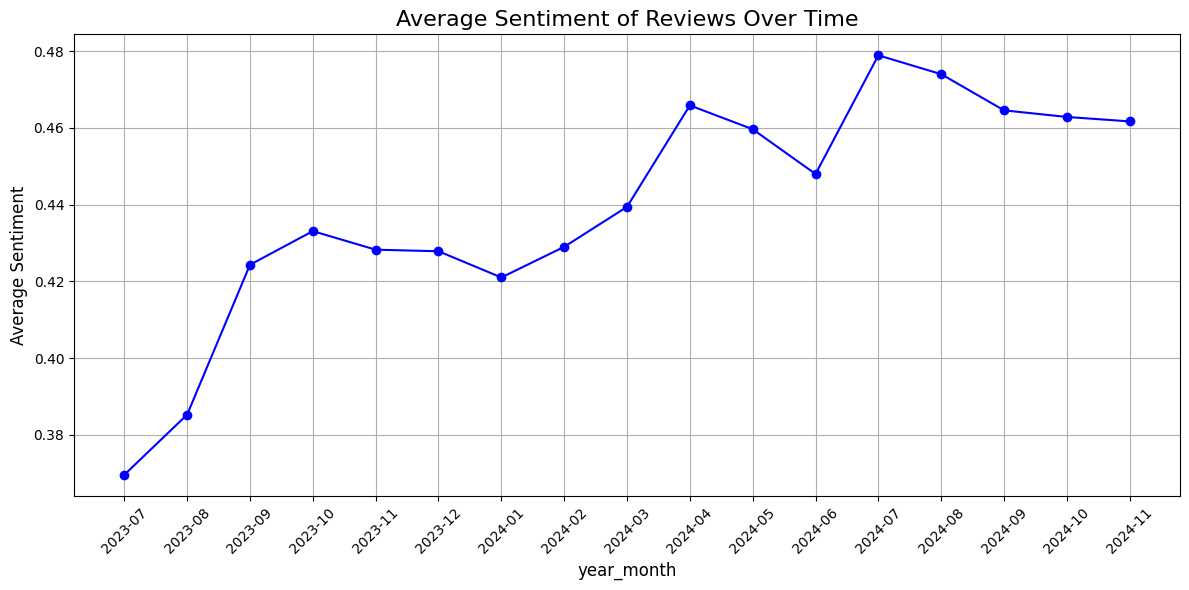

In [21]:
monthly_sentiment = df.groupby('year_month')['polarity'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['year_month'].astype(str), monthly_sentiment['polarity'], marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment of Reviews Over Time', fontsize=16)
plt.xlabel('year_month', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Identify periods of notable shifts
monthly_sentiment['sentiment_change'] = monthly_sentiment['polarity'].diff()

# 5.Temporal Trends

#### Specific date when user given more reviews

In [22]:
# Group by date and count reviews
reviews_per_date = df.groupby(df['at'].dt.date).size()
# Sort by review count in descending order and get the top 5
top_five_dates = reviews_per_date.sort_values(ascending=False).head(5)
reviews_per_day_of_week = df.groupby(df['day_of_week']).size().sort_values(ascending=False).head(3)
reviews_per_day_of_month = df.groupby(df['month']).size().sort_values(ascending=False).head(5)
# Display the top 5 dates with their review counts
print("\nTop 5 Review Date:\n",top_five_dates,
      "\n\nTop 3 Review Dates by Week:\n", reviews_per_day_of_week, 
      "\n\nTop 3 Review Dates by month:\n",reviews_per_day_of_month)


Top 5 Review Date:
 at
2023-07-25    3132
2023-07-26    1993
2024-10-08    1786
2024-05-17    1237
2024-05-14    1166
dtype: int64 

Top 3 Review Dates by Week:
 day_of_week
Tuesday      44185
Wednesday    41347
Thursday     38494
dtype: int64 

Top 3 Review Dates by month:
 month
September    35621
August       34801
October      33932
July         33542
May          25816
dtype: int64


#### Average Score by Versions

In [23]:
ratings_by_version = df.groupby('majorVersion')['score'].mean()

print("Average ratings by app version:")
ratings_by_version

Average ratings by app version:


majorVersion
0.0       4.160285
2023.0    4.482604
2024.0    4.544578
Name: score, dtype: float64

#### Average Polarity by Versions

In [24]:
sentiment_by_version = df.groupby('majorVersion')['polarity'].mean()

print("Average sentiment by app version:")
sentiment_by_version

Average sentiment by app version:
majorVersion
0.0       0.380982
2023.0    0.414434
2024.0    0.467800
Name: polarity, dtype: float64


#### Changes in Score After Update by Date

In [25]:
from datetime import datetime

#input perticukar date for get the avaerage rating before and after update
date_input = input("Enter date (YYYY-MM-DD): ")

update_date = datetime.strptime(date_input, "%Y-%m-%d")

print(update_date)

before_update = df[df['at'] < update_date]
after_update = df[df['at'] >= update_date]

before_update_avg_rating = before_update['score'].mean()
after_update_avg_rating = after_update['score'].mean()

print(f"Average rating before update: {before_update_avg_rating}")
print(f"Average rating after update: {after_update_avg_rating}")

Enter date (YYYY-MM-DD):  2023-12-5


2023-12-05 00:00:00
Average rating before update: 4.468131132342716
Average rating after update: 4.513742154133453


# 6.User Behaviours

#### Users with multiple reviews vs first-time reviewers
#### Relationship between username and review scores

In [26]:
import pandas as pd

user_review_counts = df.groupby('userName')['reviewId'].count().reset_index()
user_review_counts.rename(columns={'reviewId': 'review_count'}, inplace=True) # rename the coulumn name 'reviewId' to 'review_count'
# Merge the counts back into the main dataset
data = df.merge(user_review_counts, on='userName')
# Categorize users
data['user_type'] = data['review_count'].apply(lambda x: 'Multiple Reviews' if x > 1 else 'First-Time Reviewer')
# Calculate average scores for each user type
average_scores = data.groupby('user_type')['score'].mean().reset_index()
print("Average scores by user type:")
print(average_scores)

# Calculate average score per user
user_avg_scores = data.groupby('userName')['score'].mean().reset_index()
user_avg_scores.rename(columns={'score': 'average_score'}, inplace=True)
# Find users with consistently high or low scores
consistent_users = user_avg_scores[user_avg_scores['average_score'].isin([user_avg_scores['average_score'].max(), 
                                                                          user_avg_scores['average_score'].min()])]
print("---------------------------------------------")
print("Users with the highest and lowest average scores:")
consistent_users

Average scores by user type:
             user_type     score
0  First-Time Reviewer  4.524795
1     Multiple Reviews  4.386209
---------------------------------------------
Users with the highest and lowest average scores:


userName  average_score
0              # &            5.0
1         # Amit #            5.0
2          # HASIM            5.0
3           # JACK            5.0
4       # Kratos #            5.0
...            ...            ...
247068         조연우            5.0
247069         조은혜            5.0
247072     탱탱탱탱퉁탱통            5.0
247073          하니            5.0
247074     해운대금강영어            5.0

[201520 rows x 2 columns]

#### Count of User given multiple review

In [27]:
user_review_counts['review_count'].value_counts().sort_index()

review_count
1     235837
2       7507
3       1711
4        756
5        388
6        224
7        176
8        105
9         79
10        40
11        42
12        34
13        25
14        24
15        25
16        12
17        11
18         4
19         8
20         7
22         3
23         5
24         6
25         1
26         3
27         2
28         3
29         1
30         2
31         2
32         8
33         1
34         1
35         2
36         3
37         1
40         2
41         1
43         1
44         2
48         2
51         2
53         2
54         1
56         1
57         1
61         1
Name: count, dtype: int64

In [28]:
data.to_csv('updated_chatgpt_reviews_analysis.csv', index=False)